# Investigate a Dataset
## Udacity Data Analyst Nanodegree - Project 2

### Introduction
This notebook investigates the [Titanic](https://www.kaggle.com/c/titanic/data) dataset containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### Questions
The analysis of the Titanic dataset deals mainly with the relationship between survival of an individual and variables such as his:
* sex
* age
* passenger class
* ticket (fare) price
* number of siblings/spouses on board
* number of parents/children on board

Therefore we are investigating the following main question: Which factors made survival of an individual more likely?
During the course of analysis we are also  looking at the following specific questions:
1. How did sex, age and socio-economic (passenger class / ticket price) status influence survival?
2. How did relationships on board (number of siblings/spouses/parents/children) influence survival?

### Resources
* Udacity "Intro to data analysis" material
* [Python 3 documentation](https://docs.python.org/3/)
* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [NumPy documentation](http://docs.scipy.org/doc/)
* [Matplotlib documentation](http://matplotlib.org/contents.html#)
* [Markdown documentation](https://daringfireball.net/projects/markdown/syntax)
* [20 Python libraries you aren't using (but should)](https://www.oreilly.com/learning/20-python-libraries-you-arent-using-but-should)

### Environment setup

In [21]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots inside the notebook
%matplotlib inline

# ensure compatibility with Python 2.x
# from __future__ import print_function

### Data ingestion

In [4]:
# load dataset from local file system
titanic = pd.read_csv("titanic_data.csv")

### Data exploration

In [5]:
# show first 5 rows of dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# show last 5 rows of dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Summary statistics
Describe summary statistics
* PassengerId: 891 passengers on board
* Survived: Only 38% of the passengers survived.
* PClass: Only few passengers could afford first class, most, about 50% spent their time on board in third class
* Age: Only 714 observations contain information for age, potential data cleaning exercise? Mean age 30 with high std, youngest passenger still a baby, oldest passenger an old man(?) at age 80. He seems to be an extreme outlier, since the average age in the third percentile is 38.
* SibSp: Mean somewhat misleading, high std. There seems to be either a large family on board or someone married to many wifes (8)
* Parch: There seems to be a large family onboard (6 children)
* Fare: Mean price for a titanic ticket was 32 USD, high std. Apparently some passengers did not pay anything for their ticket (min = 0), while some potentially wealthy passengers paid up to 512 USD

Investigate interesting data points
* What does high standard deviation of Survied mean?
* Passengers in highest class (Pclass = 1)
* Youngest and oldest passenger on board (Age = 0.42/80)
* Who belonged to the large family?
* Who paid nothing at all and the maxium price?

In [7]:
# calculate summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Helper functions

In [62]:
# helper functions to print rows containing the min/max value of a variable
def titanic_min(variable):
    """
    Given a variable present in the titanic data set, the function prints the rows containing the min value
    """
    print("Information for min values of %s:" % variable)
    print(titanic.ix[titanic[variable] == min(titanic[variable])])
    
def titanic_max(variable):
    """
    Given a variable present in the titanic data set, the function prints the row containing the max value
    """
    print("Information for max values of %s:" % variable)
    print(titanic.ix[titanic[variable] == max(titanic[variable])])

#### Visualization
Besides looking at plain figures, we also like to investigate our data visually.

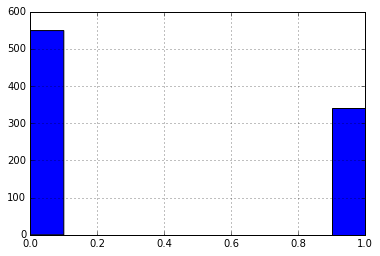

In [8]:
# plot survival data
titanic["Survived"].hist()

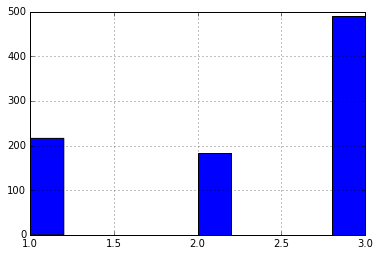

In [9]:
# plot passenger class data
titanic["Pclass"].hist()

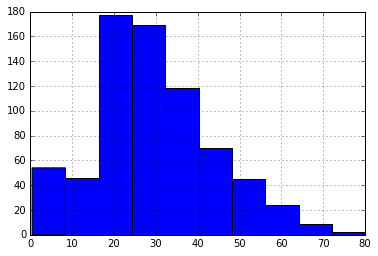

In [10]:
# plot age data
titanic["Age"].hist()

In [67]:
# print information about youngest passenger
titanic_min("Age")

Information for min values of Age:
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  


In [68]:
# print information about oldest passenger
titanic_max("Age")

Information for max values of Age:
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


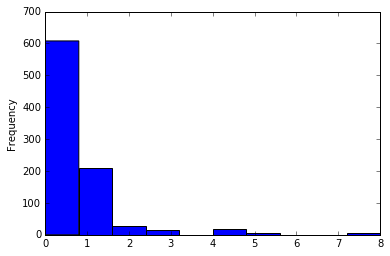

In [11]:
# plot sibling/spouse data
titanic["SibSp"].plot(kind="hist")

In [60]:
# print information about max/min values
titanic_min_max("SibSp")

Information for min values of SibSp:
     PassengerId  Survived  Pclass  \
2              3         1       3   
4              5         0       3   
5              6         0       3   
6              7         0       1   
8              9         1       3   
11            12         1       1   
12            13         0       3   
14            15         0       3   
15            16         1       2   
17            18         1       2   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
26            27         0       3   
28            29         1       3   
29            30         0       3   
30            31         0       1   
32            33         1       3   
33            34         0       2   
36            37         1       3   
37            38         0       3   
42            43         0       3   
44           

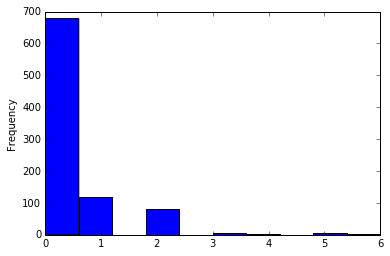

In [12]:
# plot parent/child data
titanic["Parch"].plot(kind="hist")

In [61]:
# print information about min/max parent/child data
titanic_min_max("Parch")

Information for min values of Parch:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
9             10         1       2   
11            12         1       1   
12            13         0       3   
14            15         0       3   
15            16         1       2   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
26            27         0       3   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32           

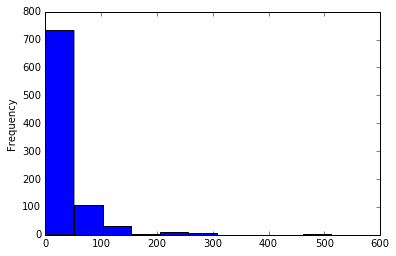

In [13]:
# plot fare data
titanic["Fare"].plot(kind="hist")

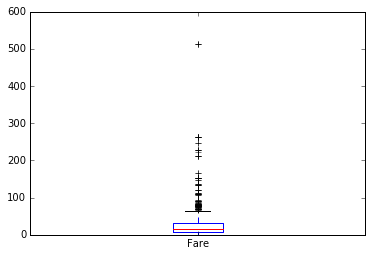

In [42]:
# plot fare data as box plot
titanic["Fare"].plot(kind="box")

In [13]:
# print passengers who paid the minimum fare price
print(titanic.ix[titanic["Fare"] == min(titanic["Fare"])])

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

In [61]:
# print passengers who paid the maximum fare price
print(titanic.ix[titanic["Fare"] == max(titanic["Fare"])])

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


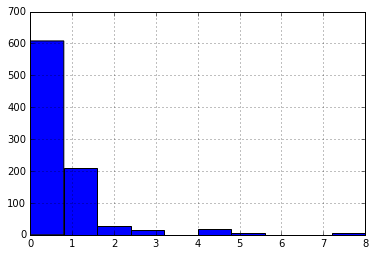

In [62]:
# plot sibling/spouse data
titanic["SibSp"].hist()

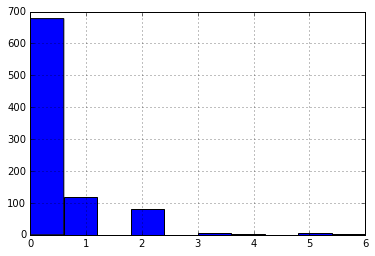

In [63]:
# plot parent/child data
titanic["Parch"].hist()

### Analysis

In [35]:
titanic_by_sex = titanic.groupby("Sex")

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [36]:
titanic_by_sex["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [33]:
titanic_by_sex["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

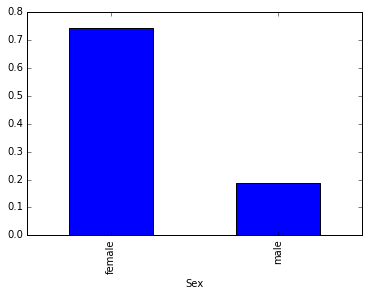

In [34]:
titanic_by_sex["Survived"].mean().plot(kind="bar")

In [37]:
titanic_by_sex_and_class = titanic.groupby(["Sex", "Pclass"])

In [40]:
titanic_by_sex_and_class[["Age", "Fare"]].describe()

Age        Fare
Sex    Pclass                              
female 1      count   85.000000   94.000000
              mean    34.611765  106.125798
              std     13.612052   74.259988
              min      2.000000   25.929200
              25%     23.000000   57.244800
              50%     35.000000   82.664550
              75%     44.000000  134.500000
              max     63.000000  512.329200
       2      count   74.000000   76.000000
              mean    28.722973   21.970121
              std     12.872702   10.891796
              min      2.000000   10.500000
              25%     22.250000   13.000000
              50%     28.000000   22.000000
              75%     36.000000   26.062500
              max     57.000000   65.000000
       3      count  102.000000  144.000000
              mean    21.750000   16.118810
              std     12.729964   11.690314
              min      0.750000    6.750000
              25%     14.125000    7.854200
              50%     21.500000   12.475000
              75%     29.750000   20.221875
              max     63.000000   69.550000
male   1      count  101.000000  122.000000
              mean    41.281386   67.226127
              std     15.139570   77.548021
              min      0.920000    0.000000
              25%     30.000000   27.728100
              50%     40.000000   41.262500
              75%     51.000000   78.459375
              max     80.000000  512.329200
       2      count   99.000000  108.000000
              mean    30.740707   19.741782
              std     14.793894   14.922235
              min      0.670000    0.000000
              25%     23.000000   12.331250
              50%     30.000000   13.000000
              75%     36.750000   26.000000
              max     70.000000   73.500000
       3      count  253.000000  347.000000
              mean    26.507589   12.661633
              std     12.159514   11.681696
              min      0.420000    0.000000
              25%     20.000000    7.750000
              50%     25.000000    7.925000
              75%     33.000000   10.008300
              max     74.000000   69.550000

### Data cleaning

Columns to consider
* Age == NaN
* Ticket == Line
* Cabin == NaN